# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

### Setup

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict


### Scrape

In [ ]:
def df_from_parse(parsed_content):
    # Scrape the parsec content for aricles
    articles = parsed_content.find_all("article", {"itemprop":"review"})

    n = len(articles)

    def def_value():
        return [None] * n

    df_dict = defaultdict(def_value)


    for i, article in enumerate(articles):
        # Find the review text
        paragraph = article.find_all("div", {"class": "text_content"})
        df_dict['reviews'][i] = paragraph[0].get_text()

        # Get overall rating
        df_dict['overall_rating'][i] = article.find_all('span',{"itemprop":"ratingValue"})[0].string

        # Find the revie ratings
        review_ratings = article.find_all("table", {"class": "review-ratings"})

        # each tr contains a review rating name and value via the num of stars
        for x in review_ratings[0].find_all("tr"):
            name_tag, value_tag = x.find_all("td")
            name = name_tag.string.lower()

            if value_tag['class'] == ['review-rating-stars', 'stars']:
                filled_stars = value_tag.find_all('span',{"class":"star fill"})
                value = max([x.string for x in filled_stars])

            else:
                value = value_tag.string

            df_dict[name][i] = value

    df = pd.DataFrame.from_dict(df_dict)
    return df

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

dfs = [None] * pages

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    print(url)

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    dfs[i-1] = df_from_parse(parsed_content)

Scraping page 1
https://www.airlinequality.com/airline-reviews/british-airways/page/1/?sortby=post_date%3ADesc&pagesize=100
Scraping page 2
https://www.airlinequality.com/airline-reviews/british-airways/page/2/?sortby=post_date%3ADesc&pagesize=100
Scraping page 3
https://www.airlinequality.com/airline-reviews/british-airways/page/3/?sortby=post_date%3ADesc&pagesize=100
Scraping page 4
https://www.airlinequality.com/airline-reviews/british-airways/page/4/?sortby=post_date%3ADesc&pagesize=100
Scraping page 5
https://www.airlinequality.com/airline-reviews/british-airways/page/5/?sortby=post_date%3ADesc&pagesize=100
Scraping page 6
https://www.airlinequality.com/airline-reviews/british-airways/page/6/?sortby=post_date%3ADesc&pagesize=100
Scraping page 7
https://www.airlinequality.com/airline-reviews/british-airways/page/7/?sortby=post_date%3ADesc&pagesize=100
Scraping page 8
https://www.airlinequality.com/airline-reviews/british-airways/page/8/?sortby=post_date%3ADesc&pagesize=100
Scraping

In [ ]:
articles = parsed_content.find_all("article", {"itemprop":"review"})
article = articles[1]
article.find_all('span',{"itemprop":"ratingValue"})[0].string


'5'

In [ ]:
df = pd.concat(dfs,axis=0, ignore_index=True)

In [ ]:
# Scrape the parsec content for aricles
articles = temp_parsed_content.find_all("article", {"itemprop":"review"})

n = len(articles)

def def_value():
    return [None] * n

df_dict = defaultdict(def_value)


for i, article in enumerate(articles):
    # Find the review text
    paragraph = article.find_all("div", {"class": "text_content"})
    df_dict['reviews'][i] = paragraph[0].get_text()

    # Get overall rating
    rating_query = article.find_all('span',{"itemprop":"ratingValue"})
    if len(rating_query) > 0:
        df_dict['overall_rating'][i] = rating_query[0].string

    # Find the revie ratings
    review_ratings = article.find_all("table", {"class": "review-ratings"})

    # Each tr contains a review rating name and value via the num of stars
    for x in review_ratings[0].find_all("tr"):
        name_tag, value_tag = x.find_all("td")
        name = name_tag.string.lower()

        if value_tag['class'] == ['review-rating-stars', 'stars']:
            filled_stars = value_tag.find_all('span',{"class":"star fill"})

            # Sometimes the stars row can be empty, ensure this is not the case
            if len(filled_stars) > 0:
                value = max([x.string for x in filled_stars])

        else:
            value = value_tag.string

        df_dict[name][i] = value

df = pd.DataFrame.from_dict(df_dict)

In [ ]:
df

,reviews,overall_rating,aircraft,type of traveller,seat type,route,date flown,seat comfort,cabin staff service,food & beverages,inflight entertainment,ground service,value for money,recommended,wifi & connectivity
0,✅ Trip Verified | Flew ATL to LHR 8th Jan 202...,4,Boeing 777-200,Family Leisure,Economy Class,Atlanta to London,January 2023,1,1,1,3,1,2,no,None
1,Not Verified | Great thing about British Airw...,5,A380,Family Leisure,Economy Class,London to Chicago,December 2022,3,2,3,4,3,2,no,None
2,Not Verified | The staff are friendly. The pla...,1,None,Family Leisure,Economy Class,Istanbul to Vancouver via Heathrow,January 2023,1,5,1,1,1,1,no,None
3,✅ Trip Verified | Probably the worst business ...,1,"A320, A380",Family Leisure,Business Class,Vienna to Los Angeles via London Heathrow,January 2023,1,2,1,1,1,1,no,1
4,"✅ Trip Verified | Definitely not recommended, ...",2,None,Business,Business Class,London to San francisco,January 2023,2,5,2,1,2,1,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,✅ Trip Verified | Naples to Gatwick. The onlin...,4,None,Solo Leisure,Economy Class,Naples to Gatwick,April 2018,3,2,2,None,2,1,no,None
996,✅ Trip Verified | I have been flying with BA f...,5,Boeing 777-300,Family Leisure,Premium Economy,São Paulo to London Heathrow,April 2018,2,1,2,3,2,2,no,None
997,✅ Trip Verified | I traveled on British Airway...,1,None,Couple Leisure,Premium Economy,Dallas to Lagos via London Heathrow,February 2018,2,2,2,2,1,1,no,1
998,✅ Trip Verified | Flew British Airways from Bu...,1,A320,Couple Leisure,Economy Class,Budapest to London Heathrow,March 2018,1,1,None,None,3,2,no,None


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/BA/data'

Mounted at /content/drive


In [ ]:
df.to_csv(file_path + "/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

### Import saved CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/BA/data'

df = pd.read_csv(file_path + "/BA_reviews.csv")
df

Mounted at /content/drive


,Unnamed: 0,reviews,overall_rating,aircraft,type of traveller,seat type,route,date flown,seat comfort,cabin staff service,food & beverages,inflight entertainment,ground service,value for money,recommended,wifi & connectivity
0,0,✅ Trip Verified | Flew ATL to LHR 8th Jan 202...,4,Boeing 777-200,Family Leisure,Economy Class,Atlanta to London,January 2023,1.0,1.0,1.0,3.0,1.0,2,no,NaN
1,1,Not Verified | Great thing about British Airw...,5,A380,Family Leisure,Economy Class,London to Chicago,December 2022,3.0,2.0,3.0,4.0,3.0,2,no,NaN
2,2,Not Verified | The staff are friendly. The pla...,1,NaN,Family Leisure,Economy Class,Istanbul to Vancouver via Heathrow,January 2023,1.0,5.0,1.0,1.0,1.0,1,no,NaN
3,3,✅ Trip Verified | Probably the worst business ...,1,"A320, A380",Family Leisure,Business Class,Vienna to Los Angeles via London Heathrow,January 2023,1.0,2.0,1.0,1.0,1.0,1,no,1.0
4,4,"✅ Trip Verified | Definitely not recommended, ...",2,NaN,Business,Business Class,London to San francisco,January 2023,2.0,5.0,2.0,1.0,2.0,1,no,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,✅ Trip Verified | Naples to Gatwick. The onlin...,4,NaN,Solo Leisure,Economy Class,Naples to Gatwick,April 2018,3.0,2.0,2.0,NaN,2.0,1,no,NaN
996,996,✅ Trip Verified | I have been flying with BA f...,5,Boeing 777-300,Family Leisure,Premium Economy,São Paulo to London Heathrow,April 2018,2.0,1.0,2.0,3.0,2.0,2,no,NaN
997,997,✅ Trip Verified | I traveled on British Airway...,1,NaN,Couple Leisure,Premium Economy,Dallas to Lagos via London Heathrow,February 2018,2.0,2.0,2.0,2.0,1.0,1,no,1.0
998,998,✅ Trip Verified | Flew British Airways from Bu...,1,A320,Couple Leisure,Economy Class,Budapest to London Heathrow,March 2018,1.0,1.0,NaN,NaN,3.0,2,no,NaN


### Clean Data

In [ ]:
df['clean_review'] = df.reviews.str.replace('✅ Trip Verified | ','', regex=False).str.strip()
df.clean_review

0      Flew ATL to LHR 8th Jan 2023. Was unlucky enou...
1      Not Verified |  Great thing about British Airw...
2      Not Verified | The staff are friendly. The pla...
3      Probably the worst business class experience I...
4      Definitely not recommended, especially for bus...
                             ...                        
995    Naples to Gatwick. The online check-in would n...
996    I have been flying with BA for the last 32 yea...
997    I traveled on British Airways with my wife fro...
998    Flew British Airways from Budapest to London H...
999    The air conditioning didn’t work in the part o...
Name: clean_review, Length: 1000, dtype: object

In [ ]:
df

,Unnamed: 0,reviews,overall_rating,aircraft,type of traveller,seat type,route,date flown,seat comfort,cabin staff service,food & beverages,inflight entertainment,ground service,value for money,recommended,wifi & connectivity,clean_review
0,0,✅ Trip Verified | Flew ATL to LHR 8th Jan 202...,4,Boeing 777-200,Family Leisure,Economy Class,Atlanta to London,January 2023,1.0,1.0,1.0,3.0,1.0,2,no,NaN,Flew ATL to LHR 8th Jan 2023. Was unlucky enou...
1,1,Not Verified | Great thing about British Airw...,5,A380,Family Leisure,Economy Class,London to Chicago,December 2022,3.0,2.0,3.0,4.0,3.0,2,no,NaN,Not Verified | Great thing about British Airw...
2,2,Not Verified | The staff are friendly. The pla...,1,NaN,Family Leisure,Economy Class,Istanbul to Vancouver via Heathrow,January 2023,1.0,5.0,1.0,1.0,1.0,1,no,NaN,Not Verified | The staff are friendly. The pla...
3,3,✅ Trip Verified | Probably the worst business ...,1,"A320, A380",Family Leisure,Business Class,Vienna to Los Angeles via London Heathrow,January 2023,1.0,2.0,1.0,1.0,1.0,1,no,1.0,Probably the worst business class experience I...
4,4,"✅ Trip Verified | Definitely not recommended, ...",2,NaN,Business,Business Class,London to San francisco,January 2023,2.0,5.0,2.0,1.0,2.0,1,no,1.0,"Definitely not recommended, especially for bus..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,✅ Trip Verified | Naples to Gatwick. The onlin...,4,NaN,Solo Leisure,Economy Class,Naples to Gatwick,April 2018,3.0,2.0,2.0,NaN,2.0,1,no,NaN,Naples to Gatwick. The online check-in would n...
996,996,✅ Trip Verified | I have been flying with BA f...,5,Boeing 777-300,Family Leisure,Premium Economy,São Paulo to London Heathrow,April 2018,2.0,1.0,2.0,3.0,2.0,2,no,NaN,I have been flying with BA for the last 32 yea...
997,997,✅ Trip Verified | I traveled on British Airway...,1,NaN,Couple Leisure,Premium Economy,Dallas to Lagos via London Heathrow,February 2018,2.0,2.0,2.0,2.0,1.0,1,no,1.0,I traveled on British Airways with my wife fro...
998,998,✅ Trip Verified | Flew British Airways from Bu...,1,A320,Couple Leisure,Economy Class,Budapest to London Heathrow,March 2018,1.0,1.0,NaN,NaN,3.0,2,no,NaN,Flew British Airways from Budapest to London H...


In [ ]:
df.clean_review[655]

'London to Calgary. Thank you to James, a Club World flight attendant on BA 0103 April 15, 2019. His service was impeccable, attentive and delightful. I thoroughly enjoyed the flight.'

### Exploratory Analysis

#### Wordcloud

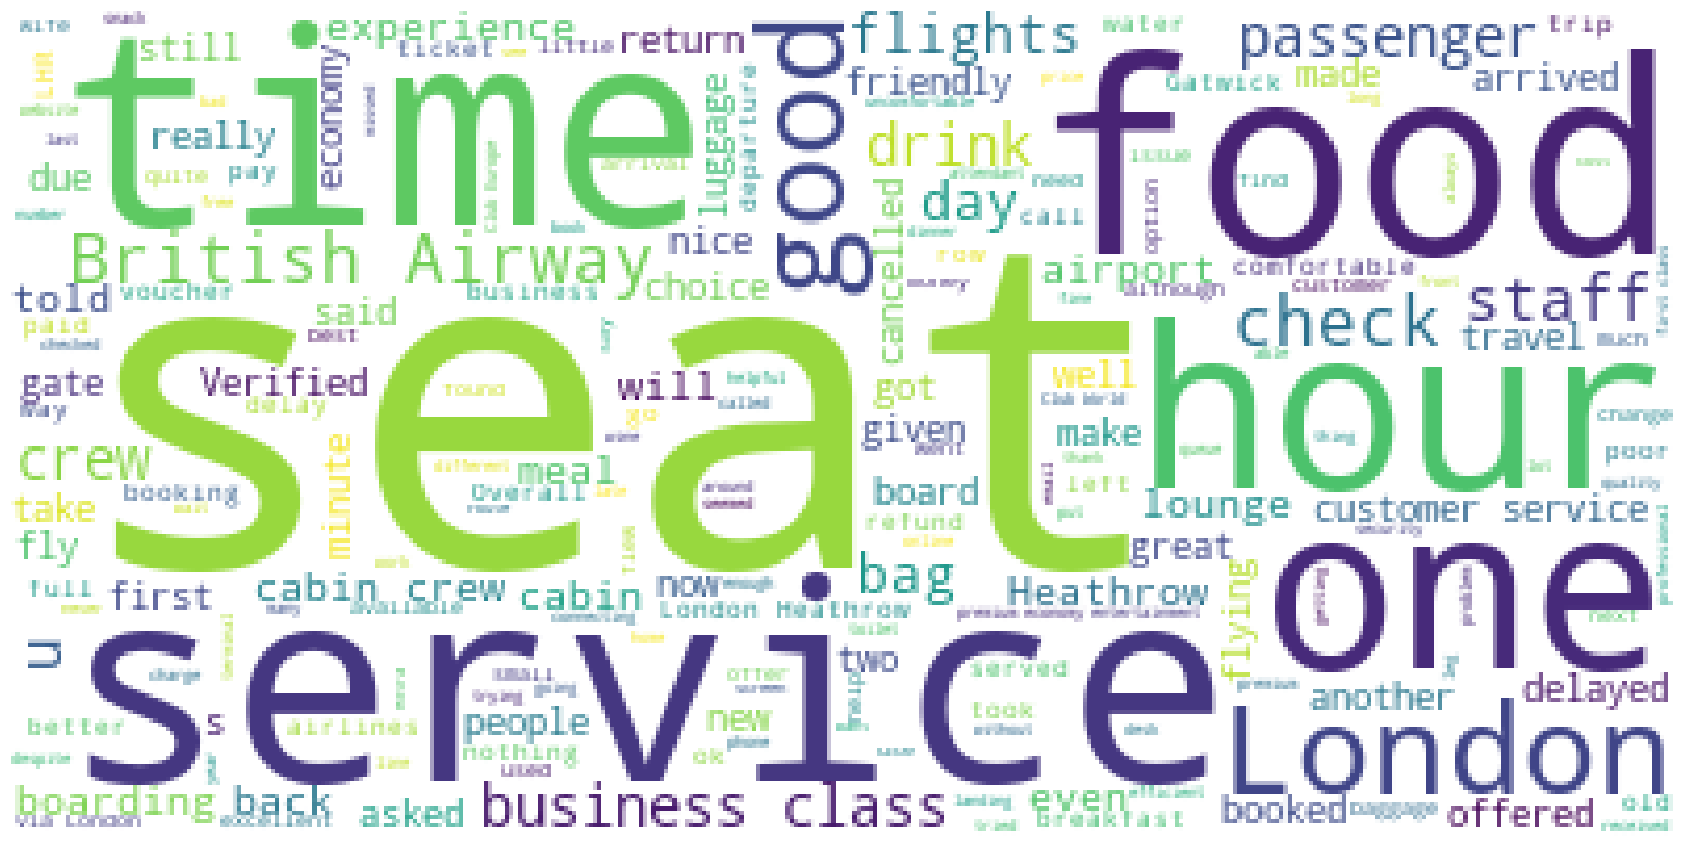

In [ ]:
text = " ".join(review for review in df.clean_review)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["flight", "BA", "airline", "aircraft", "plane"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
fig, ax = plt.subplots(figsize=(30,30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
data = [review for review in df.clean_review]

len(data)

1000

#### Topic Analysis

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

n_features = 10
n_top_words = 20
n_components = 6


In [ ]:
tf_vectorizer = CountVectorizer(
    max_df=0.7, min_df=2, max_features=n_features, stop_words="english"
)

X = tf_vectorizer.fit_transform(data)

In [ ]:
lda = LatentDirichletAllocation(
    n_components=n_components,
    learning_method="online",
    learning_offset=10.0,
    random_state=0,
)

lda.fit(X)

LatentDirichletAllocation(learning_method='online', n_components=6,
                          random_state=0)

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

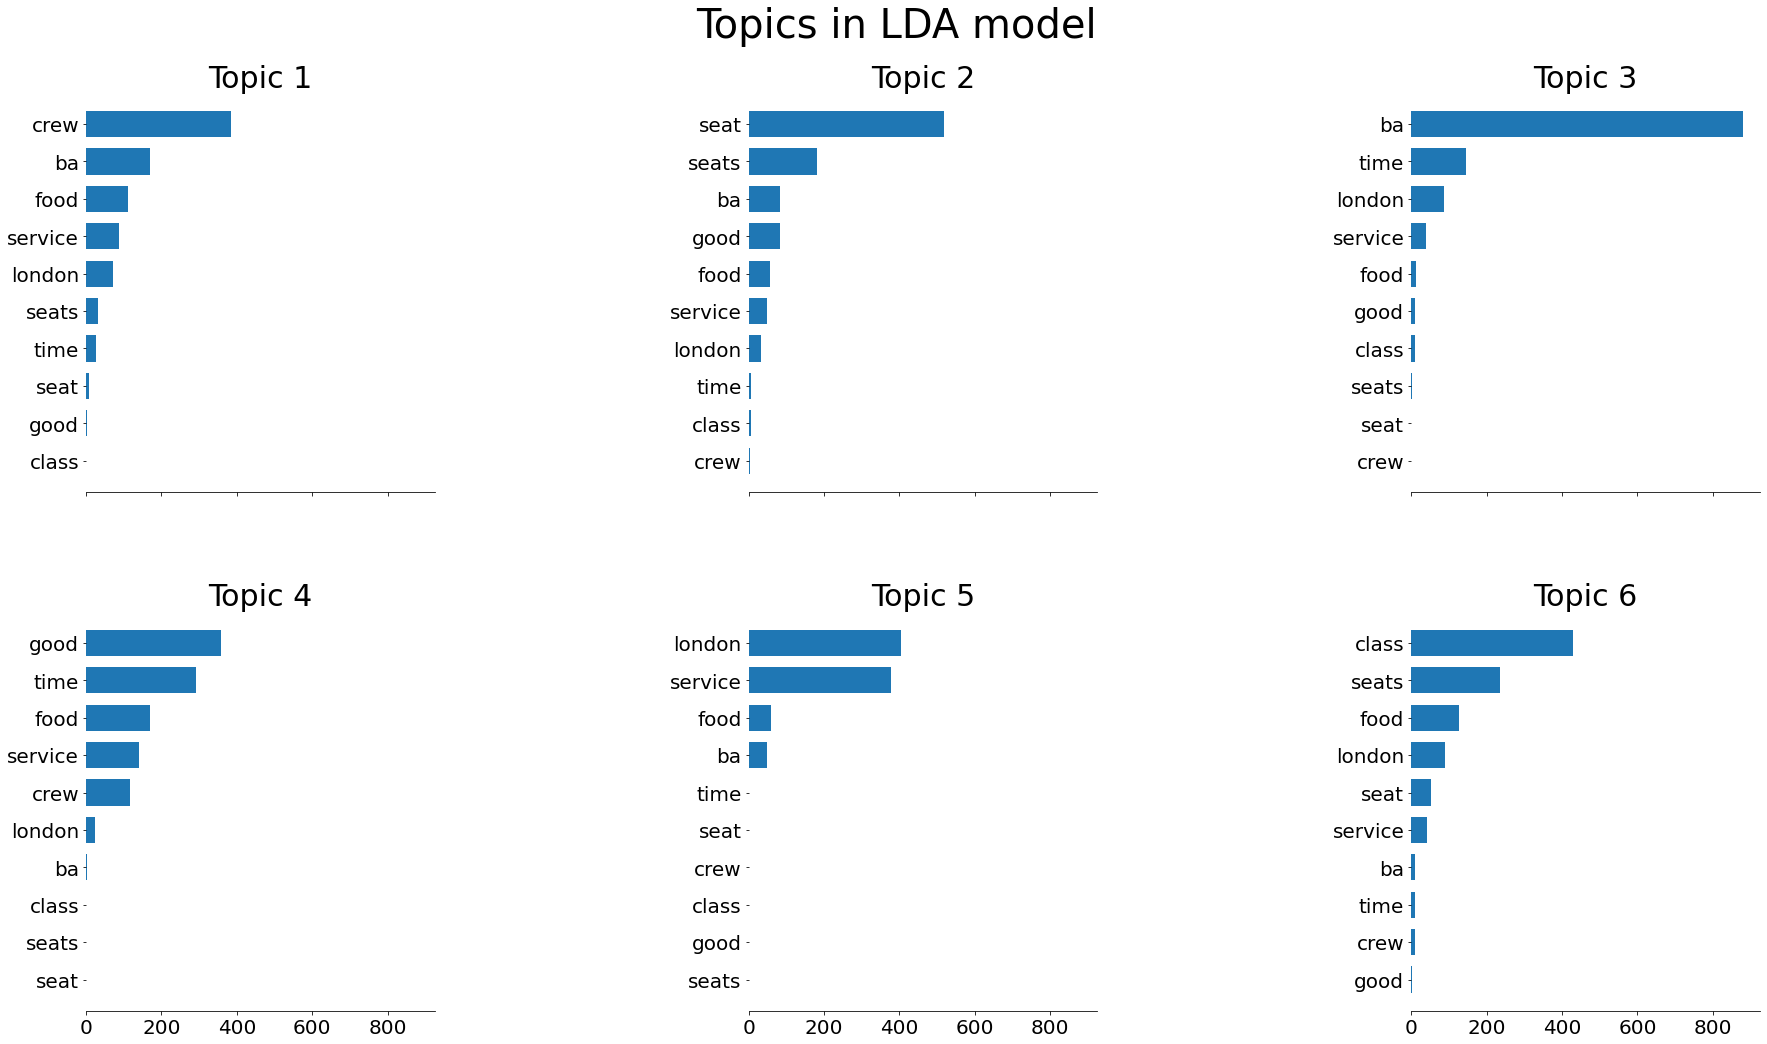

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names_out()

plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [ ]:
166666 - 18518*9

4